# 1. Herencia

Objetivo: crear una clase Futbolista, hija de la superclase Deportista

In [77]:
class Deportista():
    def __init__(self, nombre, peso, altura) -> None:
        self.nombre: str = nombre
        self.peso: float = peso
        self.altura: float = altura

    def presentarse(self):
        print(f'Hola! soy {self.nombre}, peso {self.peso} y mido {self.altura}')

    def calentar(self):
        print(f'Estoy elongando para preparme para hacer deporte')

In [78]:
class Futbolista(Deportista):
    """Subclase de Deportista"""

    def __init__(self, nombre, peso, altura, equipo) -> None:
        
        # entrega de atributos llamando al inicializador de la clase superior
        #Deportista.__init__(self, nombre, peso, altura)

        # Pero mejor podemos llamar al __init__ original sin mencionarlo explicitamente
        # acá no es necesario poner el self, solo los atributos que necesita la superclase
        super().__init__(nombre, peso, altura)

        self.equipo = equipo

    # metodo especifico de esta subclase
    def dominar(self):
        print(f'Dominando el balon')

    # metodo especifico de esta subclase
    def mostrar_equipo(self):
        print(f'{self.nombre} juega en el {self.equipo}')

    # overriding de un metodo de Deportista, metodo especializado para el Futbolista
    def calentar(self):
        print(f'Estoy elongando para calentar piernas')

In [79]:
# deportista generico
deportista_generico = Deportista('Dani', 60, 1.59)

In [80]:
deportista_generico.presentarse()
deportista_generico.calentar()

Hola! soy Dani, peso 60 y mido 1.59
Estoy elongando para preparme para hacer deporte


In [81]:
# futbolista
fut = Futbolista('Alexis', 90, 1.70, 'Arsenal')

In [82]:
# podemos usar los metodos de la super clase
fut.presentarse()
fut.calentar()

Hola! soy Alexis, peso 90 y mido 1.7
Estoy elongando para calentar piernas


In [83]:
# como tambien los suyos propios
fut.dominar()
fut.mostrar_equipo()

Dominando el balon
Alexis juega en el Arsenal


In [84]:
# los metodos con el mismo nombre actuan distinto al ser llamados por clases distintas
deportista_generico.calentar()
fut.calentar()

Estoy elongando para preparme para hacer deporte
Estoy elongando para calentar piernas


In [85]:
print(f'Tipo Deportista: {type(deportista_generico)}')
print(f'Tipo Futbolista: {type(fut)}')

Tipo Deportista: <class '__main__.Deportista'>
Tipo Futbolista: <class '__main__.Futbolista'>


In [90]:
fut.mostrar_equipo()

Alexis juega en el Arsenal


In [86]:
class Nadador(Deportista):
    def __init__(self, nombre, peso, altura, team) -> None:
        super().__init__(nombre, peso, altura)
        self.team = team

    def nadar(self):
        print(f'Nadando como un campeon por {self.team}')
    
    def calentar(self):
        print(f'Estoy elongando para que no me de un calambre en el agua')

In [87]:
nad = Nadador('Phelps', 100, 1.90, 'EEUU')
nad.presentarse()

Hola! soy Phelps, peso 100 y mido 1.9


In [88]:
deportista_generico.calentar()
fut.calentar()
nad.calentar()

Estoy elongando para preparme para hacer deporte
Estoy elongando para calentar piernas
Estoy elongando para que no me de un calambre en el agua


In [89]:
nad.nadar()

Nadando como un campeon por EEUU


## 1.1 Herencias built-ins

Objetivo: extender la clase list

In [100]:
class SchoolList(list):

    # dos metodos propios de SchoolList
    
    def pasar_lista(self):
        for alumno in self:
            print(f'{alumno} presente!')

    def quitar_dup(self):
        clean_list = []  # lista sin duplicados

        for alumno in self:
            if alumno not in clean_list:
                clean_list.append(alumno)

        return clean_list

In [94]:
lista_clases = SchoolList()

# notar que podemos usar los metodos de la clase list de python

lista_clases.append('daniel v')
lista_clases.append('cris p')
lista_clases.append('xavier s')
lista_clases.append('rafael v')
lista_clases.append('diego g')

In [95]:
lista_clases.pasar_lista()

daniel v presente!
cris p presente!
xavier s presente!
rafael v presente!
diego g presente!


In [96]:
lista_clases.append('daniel v')
lista_clases.pasar_lista()

daniel v presente!
cris p presente!
xavier s presente!
rafael v presente!
diego g presente!
daniel v presente!


In [97]:
# el metodo no actua sobre la lista misma, si no que retorna una nueva
lista_sin_dups = lista_clases.quitar_dup()

In [98]:
lista_sin_dups

['daniel v', 'cris p', 'xavier s', 'rafael v', 'diego g']

In [99]:
lista_clases

['daniel v', 'cris p', 'xavier s', 'rafael v', 'diego g', 'daniel v']

# 2. Polimorfismo

## *Overriding*: Invocacion del mismo metodo sobre objetos de distinto tipo, donde cada uno lo interpreta de acurdo a como esta definido

Ejemplo: Clase animal con las subclases Ave y Pez

In [6]:
class Animal():
    def __init__(self, name):
        self.name = name

    def moverse(self):
        # cumple una funcion distinta dependiendo del tipo
        pass

    def presentarse(self):
        print(f'{self.name} es un animal')

class Ave(Animal):
    def __init__(self, name):
        super().__init__(name)

    def moverse(self):
        # posible implementacion de movimiento distinta
        print(f'{self.name} llega volando a su destino')


class Pez(Animal):
    def __init__(self, name):
        super().__init__(name)

    def moverse(self):
        # posible implementacion de movimiento distinta a la del ave
        print(f'{self.name} llega nadando a su destino')

In [7]:
paco = Pez('Paco')
juan = Ave('Juan')

In [8]:
paco.presentarse()
juan.presentarse()

Paco es un animal
Juan es un animal


In [10]:
# comportamiento polimorfico
animales = [paco, juan]

for animal in animales:
    animal.moverse()

Paco llega nadando a su destino
Juan llega volando a su destino


## *Overloading*: definir mas de una vez la misma funcion con diferente tipo de argumentos
- Python no soporta overloading por completo
- los built in en python soportar overloading
- podemos personalizar la mayoria de operadores en python
- `+` : `__add__`
- `<` : `__lt__`


- `__str()__` for the users, `__repr__()` for the developer, print toma el primero, si es que no esta implementado, toma el segundo

## Duck Typing
- No importa de que tipo sea un objeto, mientras contenga la accion (metodo)
- Caracteristica propia de algunos lenguajes (como Python), donde se determina el tipo de un objeto al ser ejecutado, esto es un comportamiento dinamico que otros lenguajes no permiten

- por ejemplo al definir una funcion que llame a algunos metodos de una clase, algunos lenguajes estaticos exijen que se especifique el tipo del argumento
mientras que a python no le interesa el tipo de argumento mientras tenga ese metodo definido, de lo contrario tira error

## idea final

***Polimorfismo***: *como* usar algo en diferentes contextos (tipos), definiendo el metodo 

***Duck Typing***: usar algo *sin importar* el contexto (el tipo), mientras exista el metodo

# 3. Multiherencia

- Es posible que una clase herede de mas de una clase, el probema surge en el manejo del llamado de los `__init__` de las superclases
- For multiple inheritance `super()` does not work
- These [**video**](https://www.youtube.com/watch?v=uYu4hCjYDhY) explains how to apply it (pero aparece diamante :())

## Aplicando con el llamado de `__init__` de cada superclase Forma 1 (Problema del diamante)

### Forma 1: Implementacion incorreta del `__init__` de la subclase `Academico`.
El problema es que al llamar dos veces un `__init__` (uno por cada superclase, indicando su nombre y el `self`), entonces cada superclase respectiva llama a su `__init__` en su definicion, donde cada una llama al `__init__` de `object`, la superclase de todas las clases

In [ ]:
class Investigador:
    """Un investigador que investiga un area"""
    def __init__(self, area):
        self.area = area
        self.num_publis = 0
        # llamado oculto al init de object

class Docente:
    """Un docente que ejerce docencia en un departamento"""
    def __init__(self, departamento):
        self.departamento = departamento
        self.num_cursos = 3
        # llamado oculto al init de object

class Academico(Docente, Investigador):
    """Un Academico que es Docente e Investigador a la vez, tiene un nombre y una oficina"""
    def __init__(self, nombre, oficina, area, departamento):
        Investigador.__init__(self, area)  # init de la superclase

        Docente.__init__(self, departamento)  # init de la otra superclase

        # atributos propios de la subclase
        self.nombre = nombre
        self.oficina = oficina

## Problema del Diamante

La clase `Madre` es la clase de la que vienen todas, y el metodo `llamar()` es analogo al `__init__`

In [4]:
class Madre:
    llamados_a_madre = 0
    def llamar(self):
        print('Llamado a Madre')
        self.llamados_a_madre += 1

class HijoIzq(Madre):
    llamados_a_HijoIzq = 0
    def llamar(self):
        print('Llamando al Hijo Izquierdo')
        Madre.llamar(self) # llamado interno EXPLICITO
        self.llamados_a_HijoIzq += 1

class HijoDer(Madre):
    llamados_a_HijoDer = 0
    def llamar(self):
        print('Llamando al Hijo Derecho')
        Madre.llamar(self)  # llamado interno EXPLICITO
        self.llamados_a_HijoDer += 1

class Nieto(HijoIzq, HijoDer):
    llamados_a_nieto = 0
    def llamar(self):
        print('Llamando al nieto')

        HijoIzq.llamar(self) # llamdo de inicializacion
        HijoDer.llamar(self) # llamdao de inicializacion

        self.llamados_a_nieto += 1

Podemos ver como se llamo a `Madre` dos veces con `llamar()` en el llamado interno, esto es lo mismo que pasó con `object` y el `__init__`

In [5]:
s = Nieto()
s.llamar()

print('-----------------------')
print(f"LLamados al Nieto: {s.llamados_a_nieto}")
print(f"LLamados al Hijo Izq: {s.llamados_a_HijoIzq}")
print(f"LLamados al Hijo Der: {s.llamados_a_HijoDer}")
print(f"LLamados al Madre: {s.llamados_a_madre}")

Llamando al nieto
Llamando al Hijo Izquierdo
Llamado a Madre
Llamando al Hijo Derecho
Llamado a Madre
-----------------------
LLamados al Nieto: 1
LLamados al Hijo Izq: 1
LLamados al Hijo Der: 1
LLamados al Madre: 2


## Solucion al problema: llamado con `super()` y el algoritmo C3

En vez de que las clases `HijoIzq` y `HijoDer` llamen internamente a `Madre` directamente, solamente la llamamos con `super()`, Python se encarga de resolver la jerarquia (la saca de `__mro__`)

In [6]:
class Madre:
    llamados_a_madre = 0
    def llamar(self):
        print('Llamado a Madre')
        self.llamados_a_madre += 1

class HijoIzq(Madre):
    llamados_a_HijoIzq = 0
    def llamar(self):
        print('Llamando al Hijo Izquierdo')
        super().llamar() # llamado interno a la superclase
        self.llamados_a_HijoIzq += 1

class HijoDer(Madre):
    llamados_a_HijoDer = 0
    def llamar(self):
        print('Llamando al Hijo Derecho')
        super().llamar()  # llamado interno a la superclase
        self.llamados_a_HijoDer += 1

class Nieto(HijoIzq, HijoDer):
    llamados_a_nieto = 0
    def llamar(self):
        print('Llamando al nieto')

        super().llamar() # llamdo de inicializacion a la superclase/s
        
        self.llamados_a_nieto += 1

Podemos notar el orden de llamados coincide con `__mro__`

In [7]:
s = Nieto()
s.llamar()

print('-----------------------')
print(f"LLamados al Nieto: {s.llamados_a_nieto}")
print(f"LLamados al Hijo Izq: {s.llamados_a_HijoIzq}")
print(f"LLamados al Hijo Der: {s.llamados_a_HijoDer}")
print(f"LLamados al Madre: {s.llamados_a_madre}")

Llamando al nieto
Llamando al Hijo Izquierdo
Llamando al Hijo Derecho
Llamado a Madre
-----------------------
LLamados al Nieto: 1
LLamados al Hijo Izq: 1
LLamados al Hijo Der: 1
LLamados al Madre: 1


In [14]:
Nieto.__mro__ # method resolution order

(__main__.Nieto, __main__.HijoIzq, __main__.HijoDer, __main__.Madre, object)

In [15]:
HijoIzq.__mro__ # no incluye el llamado de su hermana

(__main__.HijoIzq, __main__.Madre, object)

In [16]:
HijoDer.__mro__ # no incluye el llamado a su hermana

(__main__.HijoDer, __main__.Madre, object)

In [17]:
Madre.__mro__

(__main__.Madre, object)

## Aplicacion del `super()` al primer ejemplo: Forma 2 Y Forma Final

Nos encontramos con una situacion: **¿Como entregamos los argumentos a las superclases?**

In [27]:
class Investigador:
    """Un investigador que investiga un area"""
    def __init__(self, area):
        self.area = area
        self.num_publis = 0
        # llamado oculto al init de object

class Docente:
    """Un docente que ejerce docencia en un departamento"""
    def __init__(self, departamento):
        self.departamento = departamento
        self.num_cursos = 3
        # llamado oculto al init de object

class Academico(Docente, Investigador):
    """Un Academico que es Docente e Investigador a la vez, tiene un nombre y una oficina"""
    def __init__(self, nombre, oficina, area, departamento):
        
        # Investigador.__init__(self, area)  # init de la superclase
        # Docente.__init__(self, departamento)  # init de la otra superclase

        super().__init__(???) # no podemos añadir area y departamento asi como asi

        # atributos propios de la subclase
        self.nombre = nombre
        self.oficina = oficina

### Forma 2: Añadir los argumentos de las superclases en orden

In [25]:
class Investigador:
    """Un investigador que investiga un area"""
    def __init__(self, area):
        self.area = area
        self.num_publis = 0
        # llamado oculto al init de object

class Docente:
    """Un docente que ejerce docencia en un departamento"""
    def __init__(self, departamento):
        self.departamento = departamento
        self.num_cursos = 3
        # llamado oculto al init de object

class Academico(Docente, Investigador):
    """Un Academico que es Docente e Investigador a la vez, tiene un nombre y una oficina"""
    def __init__(self, nombre, oficina, area, departamento):
        
        # Investigador.__init__(self, area)  # init de la superclase
        # Docente.__init__(self, departamento)  # init de la otra superclase

        super().__init__(area, departamento) # agregamos los argumentos en el orden de definicion

        # atributos propios de la subclase
        self.nombre = nombre
        self.oficina = oficina

Explicacion Error: Cada `__init__` de las superclases recibe dos argumentos (`self` y `area`/`departamento`), pero el primer llamado del `__init__` a `Docente` le entrega los 3 de una

In [26]:
"""Daniel, un academico que trabaja en la sala k204, como Investigador en el area de Progamacion y Docente del Departamento de Computacion"""
A = Academico('Daniel', 'K204', 'Programacion', 'Computacion')

TypeError: Docente.__init__() takes 2 positional arguments but 3 were given

Python no sabe cual de los argumentos son para que inicializador, esto se resuelve con `*args` y `**kwargs`

```Python

def funcion(arg_obligatorio, *args, **kwargs):
    # ...

```

### Forma final: uso de `*args` y `**kwargs` en el `super()`

Reemplazo del llamado a ambos inicializadores, podemos usar `**kwargs` ya que no nos interesa el orden en el que vamos ingresando los parametros en la inicializacion de una instancia de `Academico`

In [12]:
class Investigador:
    """Un investigador que investiga un area"""
    def __init__(self, area, **kwargs):
        super().__init__(**kwargs) # entrega de argumentos no_pos a la superclase en este caso a Object
        
        # atributos propios de esta clase
        self.area = area
        self.num_publis = 0

        print(f'Init de Investigador con area {self.area} y el dict kwargs {kwargs}')

class Docente:
    """Un docente que ejerce docencia en un departamento"""
    def __init__(self, departamento, **kwargs):
        super().__init__(**kwargs) # entrega de argumentos no_pos a la superclase en este caso a Object
        
        # atributos propios de esta clase
        self.departamento = departamento
        self.num_cursos = 3

        print(f'Init de docente con departamento {self.departamento} y el dict kwargs {kwargs}')

class Academico(Docente, Investigador): # notar el orden de las superclases, esto afecta al __mro__
    """Un Academico que es Docente e Investigador a la vez, tiene un nombre y una oficina"""
    def __init__(self, nombre, oficina, **kwargs):
        
        # Forma 1 Desechada (Causa Problema del Diamante)
        # Investigador.__init__(self, area)  # init de la superclase
        # Docente.__init__(self, departamento)  # init de la otra superclase

        # Forma 2 Desechada: no se sabe cual argumentos usar
        # super().__init__(area, departamento) # agregamos los argumentos en el orden de definicion

        # Forma final: entregamos una cantidad de argumentos variables a las superclases()
        super().__init__(**kwargs)
        
        # atributos propios de la subclase
        self.nombre = nombre
        self.oficina = oficina

        print(f'Init de Academico con nombre {self.nombre} y oficina {self.oficina}, y el dict kwargs {kwargs}')

In [40]:
Academico.__mro__

(__main__.Academico, __main__.Docente, __main__.Investigador, object)

In [13]:
"""Daniel, un academico que trabaja en la sala k204, como Investigador en el area de Progamacion y Docente del Departamento de Computacion"""
A = Academico('Daniel', 'K204', area ='Programacion', departamento= 'Computacion')

print('-------')

print(A.nombre) # arg de Academico
print(A.oficina) # arg de Academico
print(A.departamento) # Arg de Decente
print(A.area) # Arg de Investigador

Init de Investigador con area Programacion y el dict kwargs {}
Init de docente con departamento Computacion y el dict kwargs {'area': 'Programacion'}
Init de Academico con nombre Daniel y oficina K204, y el dict kwargs {'area': 'Programacion', 'departamento': 'Computacion'}
-------
Daniel
K204
Computacion
Programacion


Se logró usar un solo `super()` y se llamaron a todas las superclases con sus respectivos argumentos, como son `kwargs`, cada clase agarra los argumentos (por keyword) que necesita y va pasando el resto de argumentos (aun en el `**kwargs`) a las superclases superiores
- los *keywords* que no utiliza una clase pasan de largo, a los siguentes inicializadores

### Preguntas de Reflexion

- ¿Cuál permite agregar nuevas clases sin editar las anteriores?
- ¿Cuál no presentaría problema del diamante?
- ¿Estoy generando código nuevo desde cero o estoy modificando código existente?
- Si tengo subclases, ¿estas deben funcionar de forma independiente o solo son un medio para que las clases que heredan de estas funcionen correctamente?

### ¿Cuando usar super()?
- cuando el problema del diamante genere un problema en nuestro codigo
- a veces solo es necesaro solo llamar al metodo de la super clase. ej -> SuperClase.metodo()

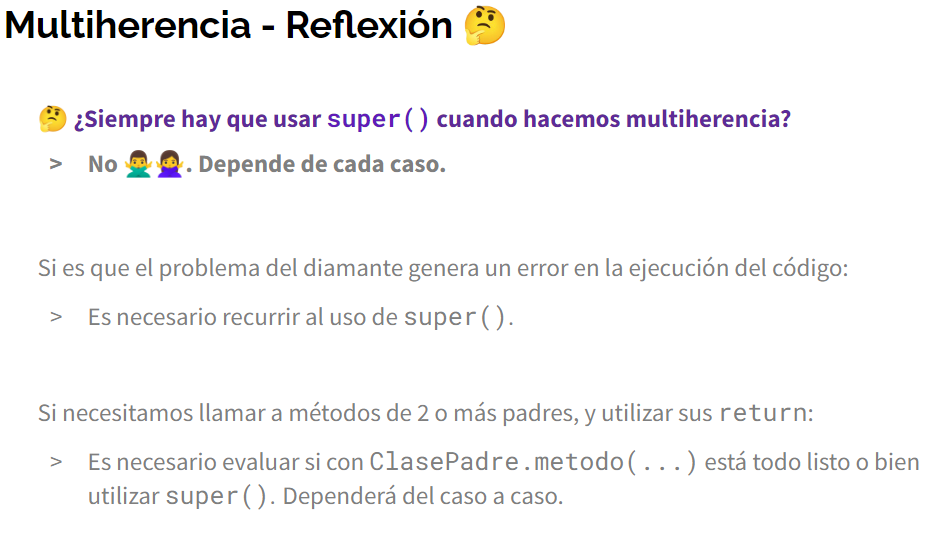

# 4. Clases Abstractas

Clase con el objetivo de modelar comportamientos base de un conjunto de subclases
- **No** se instancian directamente
- Puede poseer *metodos abstractos* que **todas las subclases deben tener definido**, aun que estos difieran en su,comportamiento, pero que se usa para definir un comportamiendo base
- Tambien tiene *metodos normales*, que pueden ser heredados sin necesidad de reimplementarlos

## Modulo `abc`, la clase `ABC` y el decorador `@abstractmethod`

In [14]:
import abc

In [17]:
class Mamifero(abc.ABC):
    """Un mamifero siempre debiese respirar y poder moverse"""
    
    @abc.abstractmethod  # metodos que toda subclase de Mamifero debiese definir
    def respirar(self):
        pass
    
    @abc.abstractmethod
    def moverse(self):
        pass

In [18]:
# no podemos instanciar un Mamifero
mam = Mamifero()

TypeError: Can't instantiate abstract class Mamifero with abstract methods moverse, respirar

In [20]:
"""Creando subclases que hereden de Mamifero"""

class Perro(Mamifero):
    """Mamifero de cuatro patas, segun muchos, el mejor amigo del hombre"""
    # debemos incluir los metodos abstractos
    def respirar(self):
        # some code...
        pass

    def moverse(self):
        # some code...
        pass

## Metodos `issubclass(SubClass, SupClass)` e  `isinstance(instance, Class)`

In [23]:
dog = Perro()
print(dog)
print('Checkeo de subclase e instancia:')
print(f"Subclase: {issubclass(Perro, Mamifero)}")
print(f"Instancia: {isinstance(dog, Perro)}")

Checkeo de subclase e instancia:
Subclase: True
Instancia: True


In [28]:
class Gato(Mamifero):
    def respirar(self):
        # some code...
        pass
     
    # no definimos el otro metodo abstracto, notar que no nos lanza error en la definicion


In [26]:
gato = Gato()

TypeError: Can't instantiate abstract class Gato with abstract method moverse

## abstract properties

Se pueden definir propiedades abstractas que **todas las subclases deben tener**

In [33]:
class Mamifero(abc.ABC):
    """Un mamifero siempre debiese respirar y poder moverse y siempre tiene ojos"""
    
    @abc.abstractmethod  # metodos que toda subclase de Mamifero debiese definir
    def respirar(self):
        pass
    
    @abc.abstractmethod
    def moverse(self):
        pass

    @property
    @abc.abstractmethod
    def ojos(self):
        return {'nunca se llega a este texto'}
    
# actualizamos las subclases

class Perro(Mamifero):
    """Mamifero de cuatro patas, segun muchos, el mejor amigo del hombre"""
    # debemos incluir los metodos abstractos
    def respirar(self):
        # some code...
        pass

    def moverse(self):
        # some code...
        pass

    @property  # propiedad abstracta 
    def ojos(self):
        return 'ojos de perro'

In [32]:
dog = Perro()
print(f"este perro tiene {dog.ojos}")


este perro tiene ojos de perro


## Ejemplo completo

Podemos tambien definir metodos no abstractos en la clase Base (abstracta), que:
- *Pueden* ser definidos y reimplementados por otras sublcases
- Pueden ser heredados directamente y, para no ser escritos nuevamente, llamados con `super().metodo_no_abs()`

In [149]:
class Mamifero(abc.ABC):
    """Un mamifero siempre debiese respirar y poder moverse y siempre tiene ojos"""
    
    def __init__(self, nombre):
        self.nombre = nombre

    @abc.abstractmethod  # metodos que toda subclase de Mamifero debiese definir
    def respirar(self):
        pass
    
    @abc.abstractmethod
    def moverse(self):
        pass

    @property
    @abc.abstractmethod
    def ojos(self):
        return {'nunca se llega a este texto'}
    
    def metodo_no_abs(self):
        print('ACTIVACION METODO')
        return 8
    
# actualizamos las subclases

class Perro(Mamifero):
    """Mamifero de cuatro patas, segun muchos, el mejor amigo del hombre"""
    # debemos incluir los metodos abstractos

    def respirar(self):
        # some code...
        pass

    def moverse(self):
        # some code...
        pass

    @property  # propiedad abstracta 
    def ojos(self):
        return 'ojos de perro'
    
    
class Gato(Mamifero):
    """Gato de toda la vida, rival eterno del perro"""
        # debemos incluir los metodos abstractos

    def respirar(self):
        # some code...
        pass

    def moverse(self):
        # some code...
        pass

    @property  # propiedad abstracta, igual es modificable
    def ojos(self):
        return 'ojos de gato'
    
    def metodo_no_abs(self):
        super().metodo_no_abs() # llamamos al metodo de la superclase
        # OJO con los return, se ejecuta el metodo pero retorna None, no se porque

In [150]:
dog = Perro('Tintin')
gato = Gato('Michi')

In [151]:
# uso de metodos no abstractos
print(f"Hola {dog.metodo_no_abs()} y tengo {dog.ojos}") # podemos acceder a el sin haberlo definido en la sublcase
print(f"hola {gato.metodo_no_abs()} y tengo {gato.ojos}")

ACTIVACION METODO
Hola 8 y tengo ojos de perro
ACTIVACION METODO
hola None y tengo ojos de gato


## Duda: porque pasa esto (revisar mi issue)

In [182]:
class Base():
    def __init__(self, name):
        self.name = name

    def metodo1(self):
        return 'soy el metodo1'
    
    def metodo2(self):
        return 'soy el metodo2'
    
class Subclase(Base):
    def __init__(self, name):
        super().__init__(name)
    
    def metodo(self): # modificacion del metodo abstracto en la subclase
        return super().metodo1()

    def metodo2(self): # mal definido
        super().metodo2()

In [177]:
i = Subclase('Dani')

string1 = i.metodo1()
string2 = i.metodo2()

print(f"{i.name} Usando el metodo abstracto:  {string1}")
print(f"Usando el metodo no abstracto: {string2}")

Dani Usando el metodo abstracto:  soy el metodo1
Usando el metodo no abstracto: None


In [181]:
print(i.__init__('juan'))

None


# Extra: Metodos Estaticos y Diagramas de clase

## Metodos estaticos

- Metodos de una clase que no dependen de alguna informacion de la clase
- Metodos dentro de una clase que no necesitan el `self`, se pueden definir con el decorador `@staticmethod`
- Util para lenguajes donde solo exista OOP, como Java
- Util para crear clases que empaqueten ciertas funcionalidades

## Diagramas de clase

### **Composicion**: flecha con base de un rombo relleno. La existencia de un grupo de objetos depende del objeto que los incluya. Las clases las creamos dentro del `__init__` de la clase que los incluye

### **Agregacion**: flecha con base de un rombo vacio La existencia de un grupo de objetos es independiente a la existencia del grupo que los incluye

### **Cardinalidad**: Grado y nivel de dependencia entre relaciones
 - 1 o muchos 1..*
 - 0 o muchos 0..*
 - Numero fijo n 

### **Herencia**: flecha de punta vacia que apunta desde una subclase a su superclase respectiva, no se repiten los atributos y metodos heredados